In [69]:
import numpy as np
import torch
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
 
t = np.array([0,0,0,0,0,1,0,0,0,0,])
y = abs(np.random.randn(10))
y = softmax(y)
print(y)
print(t)

[0.05363888 0.1259881  0.24044266 0.10085092 0.04549562 0.07435332
 0.08658979 0.05970717 0.11911419 0.09381935]
[0 0 0 0 0 1 0 0 0 0]


In [70]:
def sum_squares_err(y,t):
    return (0.5)*np.sum((y-t)**2)

print(sum_squares_err(y,t))

0.48983916510440345


In [71]:
def cross_entropy(y,t):
    delta = 1e-9
    return -np.sum(t*np.log(y+delta))
print(cross_entropy(y,t))

2.5989268786805733


In [76]:
from week3.dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,flatten=True,one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch = 109
batch_mask = np.random.choice(train_size,batch)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch.shape)
print(t_batch.shape)

(60000, 784)
(60000, 10)
(109, 784)
(109, 10)


In [81]:
def num_diff(f,x):
    h = 1e-50
    return(f(x+h)-f(x-h)/(2*h))
def f1(x):
    return 0.01*x**2+0.1*x+2

print(num_diff(f1,5))

-1.375e+50


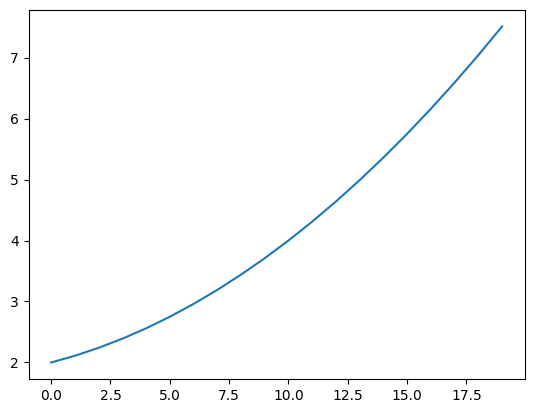

In [82]:
import matplotlib.pylab as plt
x = np.arange(0.0,20.0,1)
y = f1(x)
plt.plot(x,y)
plt.show()

In [88]:
def func2(x):
    return x[0]**2 + x[1]**2

def gradient(f,x):
    h = 1e-5
    grad  = np.zeros_like(x)
    for idx in range(x.size):
        temp_val = x[idx]
        x[idx] = temp_val + h
        fxh1 = f(x)
        x[idx] = temp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = temp_val
    
    return grad

gradient(func2,np.array([3.0,1.0]))


array([6., 2.])

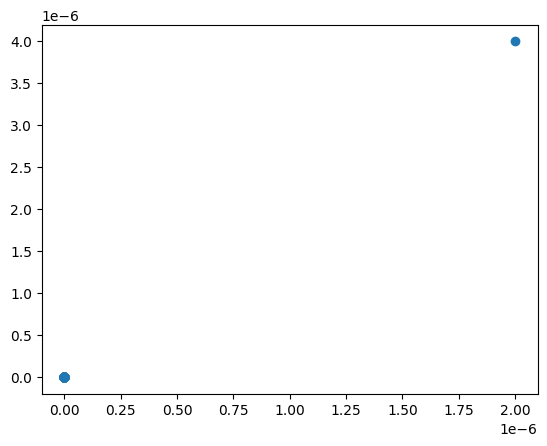

In [101]:
scatter_x0 = []
scatter_x1 = []
def gradient_descent(f,init_x,lr=0.000001,step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = gradient(f,x)
        x = lr* grad
        scatter_x0.append(x[0])
        scatter_x1.append(x[1])
    return x

gradient_descent(func2,np.array([1.0,2.0]))
plt.scatter(scatter_x0,scatter_x1)
plt.show()